In [1]:
import pandas as pd
import os
import glob
import concurrent.futures
import time

directory = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice\\NAM 2023\\Month 3'
directory2 = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice\\NAM 2023\\Month 3'
cate_dir = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'
cate_dir2 = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'

# list of Excel files to read data from
if os.path.exists(os.path.join(directory, '230301 Payment Summary - 2023-03-02T084245.428.xlsx')):
    excel_files = glob.glob(os.path.join(directory, '*.xlsx'))
else:
    excel_files = glob.glob(os.path.join(directory2, '*.xlsx'))
try:
    # # use cols 0, Barcode; 2, Category Name
    # df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,2])
    # use cols 0, Barcode; 3, SubCategory Name
    df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,3])
    pass
except FileNotFoundError:
    # df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,2])
    # use cols 0, Barcode; 3, SubCategory Name
    df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,3])
    pass
# create an empty list to store the dataframes
# dfs = [] sho

outputfile =  'dataM3.csv'
# def excel2csv
def excel2csv(inputfile, outputfile):
    
    # Check if exist file_path
    if not os.path.exists(outputfile):
        with open(outputfile, 'w') as f:
            pass

    # Read the first line of the file
    with open(outputfile, 'r') as f:
        first_line = f.readline().strip()
    # Check if the first line contains the expected column names
    has_headers = 'InvoiceID' in first_line
    df = pd.read_excel(inputfile, sheet_name='Sheet2', skiprows=2, usecols=[4,7,8,14])
    # df2 Category
    # # merge with Category, on "Barcode"
    # df = df.merge(df2, on='Barcode', how='left')
    # merge with Sub Category, on "Barcode"
    df = df.merge(df2, on='Barcode', how='left')
    
    # Check if the first line contains the expected column names
    df.to_csv(outputfile, mode='a', header= not has_headers, index=False)


# loop through the list of Excel files
with concurrent.futures.ThreadPoolExecutor() as executor:
    [executor.submit(excel2csv, file, outputfile) for file in excel_files]
    # for file in excel_files:
    #     executor.submit(excel2csv,file)

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample data
dtypes = {'InvoiceID': str, 'Barcode': str, 'Sum of Qty': str, 'Total Exclude VAT': str, 'SubCategory Name': str}
# df = pd.read_csv(r'C:\Users\minhtriet.pham\Desktop\New folder\Quantity\dataM3.csv', dtype=dtypes, on_bad_lines='warn')
df = pd.read_csv(r'C:\Users\minhtriet.pham\Desktop\New folder\Quantity\dataM3.csv', dtype=dtypes, on_bad_lines='warn')

df['Sum of Qty'] = pd.to_numeric(df['Sum of Qty'], errors='coerce').fillna(0).astype(int)
df['Total Exclude VAT'] = pd.to_numeric(df['Total Exclude VAT'], errors='coerce').fillna(0).astype(float)
df['SubCategory Name'] = df['SubCategory Name'].astype(str)
# df['Category Name'] = df['Category Name'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5586975 entries, 0 to 5586974
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   InvoiceID          object 
 1   Barcode            object 
 2   Sum of Qty         int32  
 3   Total Exclude VAT  float64
 4   SubCategory Name   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 191.8+ MB


In [3]:
# Filter InvoiceIDs where sum of Qty is 0 for all barcodes
invoice_ids_with_zero_qty = df.groupby('InvoiceID').filter(lambda x: x['Sum of Qty'].sum() == 0)['InvoiceID'].unique()

In [4]:
# Filter the original data frame based on the InvoiceIDs
df_filtered_invoice_id_zero_qty = df[df['InvoiceID'].isin(invoice_ids_with_zero_qty)]

df_filtered_invoice_id_zero_qty.sort_values(by=['InvoiceID', 'Barcode'])


,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
5391934,27,Potato Snacks,0,0.0,nan
1491430,44545,Body Care,0,0.0,nan
1051933,5,0,0,0.0,nan
170938,InvoiceID,Barcode,0,0.0,SubCategory Name
347016,InvoiceID,Barcode,0,0.0,SubCategory Name
...,...,...,...,...,...
3295753,VN0236011903230138,7622300761349,0,0.0,Sandwich cookies
3295761,VN0236011903230142,8934588653056,0,0.0,No/Less Sugar Tea
3296021,VN0236021903230006,8992222051613,0,0.0,Hair Care
2209646,VN0237010403230151,8935237711448,0,0.0,Other Non-edible Grocery


In [5]:
df

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001011203230001,8934588063053,1,6364.0,Purified water
1,VN0001011203230001,8936149340047,1,33636.0,Meat snacks
2,VN0001011203230002,8936079140014,1,15455.0,Coffee Drinks Sub
3,VN0001011203230002,8809351209948,1,44545.0,WIC/RIC Juice
4,VN0001011203230003,2010901000243,1,35455.0,Bento
...,...,...,...,...,...
5586970,VN0239023103230478,9556001222343,1,13636.0,Chocolate Pack
5586971,VN0239023103230479,8934563651138,1,12727.0,Instant Noodles Cup
5586972,VN0239023103230480,2010403000055,1,13636.0,Local Coffee
5586973,VN0239023103230480,2010403000062,2,36364.0,Local Coffee


In [6]:
# Find records in df that are not included in df_filtered_invoice_id_zero_qty
df_filtered = pd.merge(df, df_filtered_invoice_id_zero_qty, on=['InvoiceID', 'Barcode', 'Sum of Qty', 'Total Exclude VAT', 'SubCategory Name'], how='left', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'left_only'].drop('_merge', axis=1)
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001011203230001,8934588063053,1,6364.0,Purified water
1,VN0001011203230001,8936149340047,1,33636.0,Meat snacks
2,VN0001011203230002,8936079140014,1,15455.0,Coffee Drinks Sub
3,VN0001011203230002,8809351209948,1,44545.0,WIC/RIC Juice
4,VN0001011203230003,2010901000243,1,35455.0,Bento
...,...,...,...,...,...
5587086,VN0239023103230478,9556001222343,1,13636.0,Chocolate Pack
5587087,VN0239023103230479,8934563651138,1,12727.0,Instant Noodles Cup
5587088,VN0239023103230480,2010403000055,1,13636.0,Local Coffee
5587089,VN0239023103230480,2010403000062,2,36364.0,Local Coffee


In [7]:
import pandas as pd
import numpy as np

# filter out rows where 'Sum of Qty' or 'Total Exclude VAT' are zero
# df_filtered = df[(df['Sum of Qty'] > 0) & (df['Total Exclude VAT'] > 0)]

group_by_invoice = df_filtered.dropna().groupby('InvoiceID').agg({'Barcode': lambda x: ', '.join(x.astype(str)), 
                                      'Sum of Qty': 'sum', 
                                      'Total Exclude VAT': 'sum', 
                                      'SubCategory Name': lambda x: ', '.join(x.astype(str))})
group_by_invoice

,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
InvoiceID,,,,
30153,2010902000228,1,16364.0,Onigiri
72775,2,54545,0.0,nan
VN0001010103230001,2501031190329,1,18182.0,Cold Local Drinks
VN0001010103230002,"2703010000050, 2010904000035",2,54545.0,"Dried Noodles, Sandwich"
VN0001010103230003,"8936136162782, 8938503000017, 2010101000005, 8...",9,53636.0,"Energy Drinks Sub, Mineral water, Cup Of Ice, ..."
...,...,...,...,...
VN0239023103230476,"8936110050722, 2703010000050",2,53637.0,"Dessert Sub, Dried Noodles"
VN0239023103230477,"8935049501381, 8936136162782, 8936114080022, 8...",13,255453.0,"Sugar CSD, Energy Drinks Sub, Gum Sub, Instant..."
VN0239023103230478,"893852206615, 95506500, 9300682001304, 9556001...",6,110909.0,"Hard Candy, Chocolate Bar, Chocolate Pack, Cho..."


In [8]:
# filter group_by_invoice by upper_bound and lower_bound
upper_bound = 50000000
lower_bound = 1000

group_by_invoice_filtered = group_by_invoice[(group_by_invoice['Total Exclude VAT'] >= lower_bound) & (group_by_invoice['Total Exclude VAT'] <= upper_bound)]

group_by_invoice_filtered

,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
InvoiceID,,,,
30153,2010902000228,1,16364.0,Onigiri
VN0001010103230001,2501031190329,1,18182.0,Cold Local Drinks
VN0001010103230002,"2703010000050, 2010904000035",2,54545.0,"Dried Noodles, Sandwich"
VN0001010103230003,"8936136162782, 8938503000017, 2010101000005, 8...",9,53636.0,"Energy Drinks Sub, Mineral water, Cup Of Ice, ..."
VN0001010103230004,"6942836701024, 6942836702403",4,118181.0,"Chocolate Bar, Chocolate Bar"
...,...,...,...,...
VN0239023103230476,"8936110050722, 2703010000050",2,53637.0,"Dessert Sub, Dried Noodles"
VN0239023103230477,"8935049501381, 8936136162782, 8936114080022, 8...",13,255453.0,"Sugar CSD, Energy Drinks Sub, Gum Sub, Instant..."
VN0239023103230478,"893852206615, 95506500, 9300682001304, 9556001...",6,110909.0,"Hard Candy, Chocolate Bar, Chocolate Pack, Cho..."


In [9]:
import statistics
from scipy import stats
# Calculate the statistical measures using describe() method
stat = group_by_invoice_filtered.describe()

# Calculate the median and mode of the 'Total Exclude VAT' column
mean = statistics.mean(group_by_invoice_filtered['Total Exclude VAT'])
median = statistics.median(group_by_invoice_filtered['Total Exclude VAT'])
mode = group_by_invoice_filtered['Total Exclude VAT'].mode()[0]
std = statistics.stdev(group_by_invoice_filtered['Total Exclude VAT'])
Sum = group_by_invoice_filtered['Total Exclude VAT'].sum()
min_val = group_by_invoice_filtered['Total Exclude VAT'].min()
max_val = group_by_invoice_filtered['Total Exclude VAT'].max()
# Extract the desired values from the summary
mean1 = stat.loc['mean']
std1 = stat.loc['std']
min_val1 = stat.loc['min']
max_val1 = stat.loc['max']

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print ("Sum:", Sum)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)

# print("Mode of Total Exculde VAT", group_by_invoice['Total Exclude VAT'].mode()[0])

# Create a DataFrame with the calculated statistical measures
summary_statistic_df = pd.DataFrame({'Mean': [mean],
                                     'Median': [median],
                                     'Mode': [mode],
                                     'Standard Deviation': [std],
                                     'Sum': [Sum],
                                     'Minimum Value': [min_val],
                                     'Maximum Value': [max_val]})

# Export the DataFrame to an Excel file
summary_statistic_df.to_excel('Summary Statistic M3.xlsx', index=False)

Mean: 46791.43353461509
Median: 28182.0
Mode: 10909.0
Standard Deviation: 89619.90132757647
Sum: 120252252900.92
Minimum Value: 1464.0
Maximum Value: 49115455.0


In [10]:
import numpy as np
import pandas as pd
#  Update bins and labels for the new range concept
bins = np.concatenate(([0], np.arange(0, 50000, 5000), np.arange(50000, 100000, 10000), np.arange(100000, 350000, 25000), np.arange(100000, 350001, 50000), [np.inf]))
bins = np.unique(bins)  # Remove duplicate edges
labels = ['{} to {}' .format(i, i+4999) for i in range(0, 50000, 5000)] + ['{} to {}' .format(i, i+9999) for i in range(50000, 100000, 10000)] + ['{} to {}' .format(i, i+24999) for i in range(100000, 350000, 25000)] + [ '>=350000']

def grouped_data(df_filtered):

    df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)
    grouped_data = df_filtered.groupby('Basket Value')['Total Exclude VAT'].agg(['count','mean','median'])

    # Add a new column for Count x Mean
    grouped_data['Value'] = grouped_data['count'] * grouped_data['mean']

    # Update x-axis labels
    grouped_data.index = grouped_data.index.astype(str).str.replace(',', '')

    return grouped_data

grouped_data = grouped_data(group_by_invoice_filtered)

grouped_data


C:\Users\minhtriet.pham\AppData\Local\Temp\ipykernel_8348\3052343785.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)


,count,mean,median,Value
Basket Value,,,,
0 to 4999,28719,3082.974964,2727.0,8.853996e+07
5000 to 9999,233174,7851.124169,8182.0,1.830678e+09
10000 to 14999,374868,12338.115630,11818.0,4.625165e+09
15000 to 19999,288973,17670.572136,18182.0,5.106318e+09
20000 to 24999,206915,22679.790648,22727.0,4.692789e+09
25000 to 29999,235536,27528.804964,27273.0,6.484025e+09
30000 to 34999,163057,32806.100634,32727.0,5.349264e+09
35000 to 39999,151586,37472.326851,37273.0,5.680280e+09
40000 to 44999,106154,42755.182245,42727.0,4.538634e+09


c:\Users\minhtriet.pham\AppData\Local\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


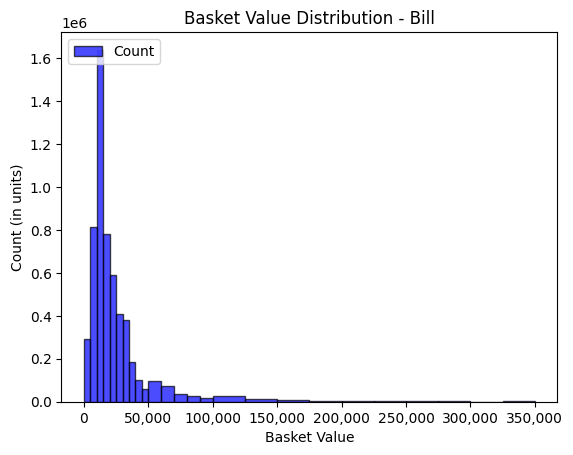

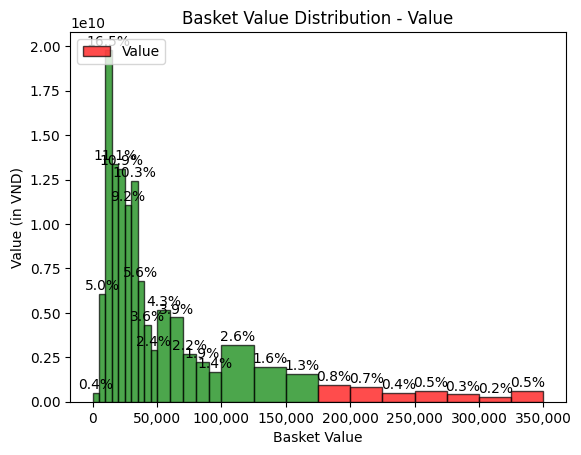

                    Count     Mean   Median         Value  %Value in total
Basket Value                                                              
0 to 4999          28,719    3,083    2,727  8.853996e+07         0.073629
5000 to 9999      233,174    7,851    8,182  1.830678e+09         1.522365
10000 to 14999    374,868   12,338   11,818  4.625165e+09         3.846219
15000 to 19999    288,973   17,671   18,182  5.106318e+09         4.246339
20000 to 24999    206,915   22,680   22,727  4.692789e+09         3.902454
25000 to 29999    235,536   27,529   27,273  6.484025e+09         5.392019
30000 to 34999    163,057   32,806   32,727  5.349264e+09         4.448369
35000 to 39999    151,586   37,472   37,273  5.680280e+09         4.723637
40000 to 44999    106,154   42,755   42,727  4.538634e+09         3.774261
45000 to 49999    105,007   47,520   47,273  4.989909e+09         4.149535
50000 to 59999    144,192   55,052   54,546  7.938037e+09         6.601154
60000 to 69999    107,819

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Calculate total value
total_value = grouped_data['Value'].sum()

# Add a new column for %Value in total
grouped_data['%Value in total'] = grouped_data['Value'] / total_value * 100

# Plot histogram for count
fig, ax1 = plt.subplots()
n, bins, patches = ax1.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Basket Value')
ax1.set_ylabel('Count (in units)')
ax1.set_title('Basket Value Distribution - Bill')
ax1.legend(['Count'], loc='upper left')
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Plot histogram for value
fig, ax2 = plt.subplots()
n2, bins2, patches2 = ax2.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='red', edgecolor='black', weights=df_filtered['Total Exclude VAT'])
ax2.set_xlabel('Basket Value')
ax2.set_ylabel('Value (in VND)')
ax2.set_title('Basket Value Distribution - Value')
ax2.legend(['Value'], loc='upper left')
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Add percentage value labels to the top of each column
for i in range(len(patches2)):
    height = patches2[i].get_height()
    percentage = height / total_value * 100
    ax2.annotate(f'{percentage:.1f}%', xy=(patches2[i].get_x() + patches2[i].get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center')

# Highlight columns with cumulative %Value in total up to 80%
cumulative_percentage = 0
for i, patch in enumerate(patches2):
    cumulative_percentage += grouped_data['%Value in total'].iloc[i]
    if cumulative_percentage <= 80:
        patch.set_fc('green')
    else:
        patch.set_fc('red')

plt.show()

# Display grouped data with additional column
grouped_data['Count'] = grouped_data['count'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Mean'] = grouped_data['mean'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Median'] = grouped_data['median'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Count x Mean'] = grouped_data['Value'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data = grouped_data[['Count', 'Mean', 'Median', 'Value', '%Value in total']]
print(grouped_data)

In [12]:
grouped_data.to_csv('groupdataM3.csv')

In [13]:
# Apply string slicing to create new columns 'StorID' and 'BusinessDate'
group_by_invoice['StoreID'] = group_by_invoice.index.map(lambda x: x[:6])
group_by_invoice['BusinessDate'] = group_by_invoice.index.map(lambda x: x[8:14])

# Reorder the columns
group_by_invoice = group_by_invoice.reindex (columns=['StoreID','BusinessDate','Barcode','Sum of Qty','Total Exclude VAT','SubCategory Name','Category Name'])

# Show the first 10 rows
group_by_invoice.head(10)


,StoreID,BusinessDate,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,Category Name
InvoiceID,,,,,,,
30153,30153,,2010902000228,1,16364.0,Onigiri,NaN
72775,72775,,2,54545,0.0,nan,NaN
VN0001010103230001,VN0001,010323,2501031190329,1,18182.0,Cold Local Drinks,NaN
VN0001010103230002,VN0001,010323,"2703010000050, 2010904000035",2,54545.0,"Dried Noodles, Sandwich",NaN
VN0001010103230003,VN0001,010323,"8936136162782, 8938503000017, 2010101000005, 8...",9,53636.0,"Energy Drinks Sub, Mineral water, Cup Of Ice, ...",NaN
VN0001010103230004,VN0001,010323,"6942836701024, 6942836702403",4,118181.0,"Chocolate Bar, Chocolate Bar",NaN
VN0001010103230005,VN0001,010323,8936094291302,1,31818.0,Import Beer Can,NaN
VN0001010103230006,VN0001,010323,"8934755010033, 8934822261214",5,110000.0,"Sanitary Napkin/ Intimate Wash, Import Beer Can",NaN
VN0001010103230008,VN0001,010323,8935237711127,1,28571.0,Sub Toys,NaN


In [14]:
#Apply string slicing to create new columns 'StoreID' and 'BusinessDate' 
# Check if existed columns 'StoreID' and 'BusinessDate' before applying string slicing 
if 'StoreID' in df_filtered.columns:
    df_filtered.drop('StoreID', axis = 1, inplace = True)
if 'BusinessDate' in df_filtered.columns:
    df_filtered.drop('BusinessDate', axis = 1, inplace = True)
df_filtered['StoreID'] = df_filtered['InvoiceID'].map(lambda x: x[:6] if not pd.isna(x) else x)
df_filtered ['BusinessDate'] = df_filtered ['InvoiceID'].map(lambda x: x[8:14] if not pd.isna(x) else x)
#Dataframe for Category name; use cols 0, Barcode; 2, Category Name
cate_df = pd.read_excel('C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx', sheet_name='Sheet1', usecols=[0,2])

df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,StoreID,BusinessDate
0,VN0001011203230001,8934588063053,1,6364.0,Purified water,VN0001,120323
1,VN0001011203230001,8936149340047,1,33636.0,Meat snacks,VN0001,120323
2,VN0001011203230002,8936079140014,1,15455.0,Coffee Drinks Sub,VN0001,120323
3,VN0001011203230002,8809351209948,1,44545.0,WIC/RIC Juice,VN0001,120323
4,VN0001011203230003,2010901000243,1,35455.0,Bento,VN0001,120323
...,...,...,...,...,...,...,...
5587086,VN0239023103230478,9556001222343,1,13636.0,Chocolate Pack,VN0239,310323
5587087,VN0239023103230479,8934563651138,1,12727.0,Instant Noodles Cup,VN0239,310323
5587088,VN0239023103230480,2010403000055,1,13636.0,Local Coffee,VN0239,310323
5587089,VN0239023103230480,2010403000062,2,36364.0,Local Coffee,VN0239,310323


In [15]:
# Convert Barcode to string
cate_df['Barcode'] = cate_df['Barcode'].astype(str)
# Merge dataframes
merged_df = pd.merge(df_filtered, cate_df, on='Barcode',how='left')
merged_df

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,StoreID,BusinessDate,Category Name
0,VN0001011203230001,8934588063053,1,6364.0,Purified water,VN0001,120323,Bottled Water
1,VN0001011203230001,8936149340047,1,33636.0,Meat snacks,VN0001,120323,Snacks for Drinks
2,VN0001011203230002,8936079140014,1,15455.0,Coffee Drinks Sub,VN0001,120323,Coffee Drinks
3,VN0001011203230002,8809351209948,1,44545.0,WIC/RIC Juice,VN0001,120323,Juice
4,VN0001011203230003,2010901000243,1,35455.0,Bento,VN0001,120323,Rice Offsite
...,...,...,...,...,...,...,...,...
5583720,VN0239023103230478,9556001222343,1,13636.0,Chocolate Pack,VN0239,310323,Chocolate
5583721,VN0239023103230479,8934563651138,1,12727.0,Instant Noodles Cup,VN0239,310323,Instant Noodles
5583722,VN0239023103230480,2010403000055,1,13636.0,Local Coffee,VN0239,310323,FF Coffee
5583723,VN0239023103230480,2010403000062,2,36364.0,Local Coffee,VN0239,310323,FF Coffee


In [16]:
# Calculate the ADS for each store

grouped_by_store_net = group_by_invoice.groupby('StoreID').agg({'Total Exclude VAT': 'sum', 'Sum of Qty': 'sum', 'BusinessDate': 'nunique'})
grouped_by_store_net['ADS'] = grouped_by_store_net['Total Exclude VAT'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net['ADQ'] = grouped_by_store_net['Sum of Qty'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net['ASI'] = grouped_by_store_net['Total Exclude VAT'] / grouped_by_store_net['Sum of Qty']
grouped_by_store_net

,Total Exclude VAT,Sum of Qty,BusinessDate,ADS,ADQ,ASI
StoreID,,,,,,
30153,1.636400e+04,1,1,1.636400e+04,1.000000,16364.000000
72775,0.000000e+00,54545,1,0.000000e+00,54545.000000,0.000000
VN0001,9.250423e+08,56785,31,2.984007e+07,1831.774194,16290.258343
VN0002,1.154784e+09,55812,31,3.725109e+07,1800.387097,20690.598850
VN0003,9.231823e+08,52812,31,2.978007e+07,1703.612903,17480.540767
...,...,...,...,...,...,...
VN0235,4.093827e+08,25093,31,1.320589e+07,809.451613,16314.618300
VN0236,3.718064e+08,20728,31,1.199375e+07,668.645161,17937.397047
VN0237,3.032373e+08,16566,31,9.781849e+06,534.387097,18304.799227


In [17]:
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,StoreID,BusinessDate
0,VN0001011203230001,8934588063053,1,6364.0,Purified water,VN0001,120323
1,VN0001011203230001,8936149340047,1,33636.0,Meat snacks,VN0001,120323
2,VN0001011203230002,8936079140014,1,15455.0,Coffee Drinks Sub,VN0001,120323
3,VN0001011203230002,8809351209948,1,44545.0,WIC/RIC Juice,VN0001,120323
4,VN0001011203230003,2010901000243,1,35455.0,Bento,VN0001,120323
...,...,...,...,...,...,...,...
5587086,VN0239023103230478,9556001222343,1,13636.0,Chocolate Pack,VN0239,310323
5587087,VN0239023103230479,8934563651138,1,12727.0,Instant Noodles Cup,VN0239,310323
5587088,VN0239023103230480,2010403000055,1,13636.0,Local Coffee,VN0239,310323
5587089,VN0239023103230480,2010403000062,2,36364.0,Local Coffee,VN0239,310323


In [18]:
import numpy as np
from sklearn.linear_model import RANSACRegressor

# StoreID and BusinessDate added to the filter dataframe
df_filtered['InvoiceID'] = df_filtered['InvoiceID'].astype(str)
df_filtered['StoreID'] = df_filtered['InvoiceID'].apply(lambda x: x[:6])
df_filtered['BusinessDate'] = df_filtered['InvoiceID'].apply(lambda x: x[8:14])

# Group by Basket Value and StoreID and calculate count and mean
grouped_data_store = df_filtered.groupby(['InvoiceID', 'StoreID']).agg({'InvoiceID': 'count', 'Total Exclude VAT': 'mean'})
grouped_data_store.rename(columns={'InvoiceID': 'count', 'Total Exclude VAT': 'mean'}, inplace=True)
grouped_data_store.reset_index(inplace=True)

# Calculate the 'value' column as the product of 'mean' and 'count'
grouped_data_store['Value'] = grouped_data_store['mean'] * grouped_data_store['count']

# Drop rows with NaN or 0 values in 'mean' or 'Value' columns
grouped_data_store.dropna(subset=['mean', 'Value'], inplace=True)
grouped_data_store = grouped_data_store[(grouped_data_store['mean'] != 0) & (grouped_data_store['Value'] != 0)]

# Fit RANSAC Regression model to 'Value' and 'mean' columns
X = grouped_data_store[['Value']].values
y = grouped_data_store['mean'].values

regressor = RANSACRegressor()
regressor.fit(X, y)

# Predict the mean values using the fitted model
y_pred = regressor.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Set a threshold for identifying outliers
threshold = 1.5 * np.median(np.abs(residuals))

# Identify outliers based on residuals
outliers = grouped_data_store[residuals > threshold]

# Remove outliers from the grouped_data_store DataFrame
grouped_data_store_clean = grouped_data_store[residuals <= threshold]

# Show the cleaned grouped data columns
print(grouped_data_store_clean)


                  InvoiceID StoreID  count          mean     Value
0                     30153   30153      1  16364.000000   16364.0
4        VN0001010103230003  VN0001      4  13409.000000   53636.0
9        VN0001010103230009  VN0001      1   9091.000000    9091.0
10       VN0001010103230010  VN0001      1  11818.000000   11818.0
11       VN0001010103230011  VN0001      2  13636.500000   27273.0
...                     ...     ...    ...           ...       ...
2569971  VN0239023103230474  VN0239      1  11818.000000   11818.0
2569974  VN0239023103230477  VN0239     11  23223.000000  255453.0
2569975  VN0239023103230478  VN0239      4  27727.250000  110909.0
2569976  VN0239023103230479  VN0239      1  12727.000000   12727.0
2569977  VN0239023103230480  VN0239      3  25151.666667   75455.0

[1792549 rows x 5 columns]


In [19]:
import numpy as np

# Sort the 'grouped_data_store' DataFrame by the 'value' column in descending order
grouped_data_store.sort_values('Value', ascending=False, inplace=True)

# Calculate the cumulative sum of the 'value' column
grouped_data_store['cumulative_sum'] = grouped_data_store['Value'].cumsum()

# Calculate the cumulative distribution percentage
grouped_data_store['cumulative_percentage'] = grouped_data_store['cumulative_sum'] / grouped_data_store['Value'].sum()

# Filter rows where the cumulative percentage is less than or equal to 0.8
filtered_data = grouped_data_store[grouped_data_store['cumulative_percentage'] >= 0.8]

# Print the filtered results
print(filtered_data)

                  InvoiceID StoreID  count     mean    Value  cumulative_sum  \
1097353  VN0098021503230199  VN0098      1  31818.0  31818.0    9.620183e+10   
887717   VN0082011503230148  VN0082      2  15909.0  31818.0    9.620186e+10   
310052   VN0027021403230432  VN0027      1  31818.0  31818.0    9.620189e+10   
97513    VN0005021603230510  VN0005      1  31818.0  31818.0    9.620192e+10   
97815    VN0005021703230287  VN0005      3  10606.0  31818.0    9.620195e+10   
...                     ...     ...    ...      ...      ...             ...   
258348   VN0022011803230093  VN0022      1   1464.0   1464.0    1.202523e+11   
2524916  VN0234022003230247  VN0234      1      5.0      5.0    1.202523e+11   
2344096  VN0213011603230079  VN0213      1      2.0      2.0    1.202523e+11   
2523202  VN0234021403230305  VN0234      1      2.0      2.0    1.202523e+11   
1803688  VN0164012203230113  VN0164      1      1.0      1.0    1.202523e+11   

         cumulative_percentage  
109735